# THE FACE OF CONFLICT IN AFRICA

##### Context : The Armed Conflict Location & Event Data Project aims to track armed conflict around the world by recording the groups attacking, where they occurred and any other details about the conflict.The dataset we will be dealing with in this analysis contains conflict data about the African continent only.

### Research Question : What does conflict look like in Africa in the context of time and conflict type ?

#### Data Wrangling

In [52]:
#Import the relevant libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("ACLED Africa 1997-2022.csv")

In [53]:
# Visual Assessment of the dataset

# look through a random sample of the dataset, the same contains 20 conflicts
data.sample(20)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
229788,7520351,729,SUD5154,5154,26 March 2013,2013,1,Violence against civilians,Attack,Unidentified Armed Group (Sudan),...,Khartoum,15.5725,32.5364,1,Al Khartoum,National,A large fire broke out at the Khartoum Univers...,0,1611019289,SDN
128262,9253306,434,LBY7339,7339,31 January 2019,2019,1,Protests,Peaceful protest,Protesters (Libya),...,Benghazi,32.1177,20.1293,1,Libya24,National,"On 31 January 2019, residents in Benghazi stag...",0,1652899814,LBY
173442,4795305,818,EGY7818,7818,29 August 2016,2016,1,Battles,Armed clash,Police Forces of Egypt (2014-),...,Al Haram,29.9931,31.1309,1,Egypt Independent,National,Two police conscripts were injured on 29 Augus...,0,1618529365,EGY
213255,8557696,710,SAF4682,4682,24 April 2014,2014,1,Protests,Peaceful protest,Protesters (South Africa),...,Phokeng,-25.5673,27.1596,1,Congress of South African Trade Unions,Other,"COSATU, with the support of the alliance, led ...",0,1632243619,ZAF
6992,9693460,404,KEN9537,9537,22 October 2022,2022,1,Riots,Mob violence,Rioters (Kenya),...,Esumeyia,0.3188,34.6815,1,Star (Kenya),National,"On 22 October 2022, a mob beat to death two me...",2,1670285103,KEN
29334,8975125,231,ETH8305,8305,07 March 2022,2022,1,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,...,Begi,9.3457,34.5315,1,Oromiya Media Network,International,"On 7 March 2022, OLF Shane rebels attacked an ...",8,1649098463,ETH
70195,9692017,706,SOM32968,32968,13 January 2021,2021,1,Battles,Armed clash,Al Shabaab,...,K60,1.9243,44.9231,2,Undisclosed Source,Local partner-Other,"On 13 January 2021, Al Shabaab militants attac...",0,1670283469,SOM
31691,8850563,710,SAF16248,16248,13 February 2022,2022,1,Riots,Mob violence,Rioters (South Africa),...,East London,-33.0153,27.9116,1,Daily Dispatch,Subnational,"On 13 February 2022, a gun-wielding ANC member...",0,1645475952,ZAF
8746,9569470,466,MLI7461,7461,05 October 2022,2022,2,Riots,Mob violence,Rioters (Mali),...,Bamako,12.6500,-8.0000,1,Mali Jet,National,"Around 5 October 2022 (week of), a number of p...",0,1666024829,MLI
44684,9368734,180,DRC22803,22803,11 October 2021,2021,1,Battles,Armed clash,Military Forces of the Democratic Republic of ...,...,Mambelenga,1.0354,29.5866,1,Actualite; Radio Okapi,National,"On 11 October 2021, the FARDC clashed against ...",2,1655847849,COD


**Observations**
Remove columns that might be irrelevant to our analysis : ["iso","event_id_cnty","event_id_no_cnty","iso3"]
Seperate the event_date column into day,month and year .To aid in more granular analysis
Convert the inter1 and inter2 codes into thier actual names to make the data categorical

##### Programmatic Assessment Of The Data

In [54]:
#first create a copy of the data so that we can always get it after we have modified some columns and values
df = data.copy()

In [55]:
#Get dimensions of data and see the column types and null values
print(f"Dimensions : {data.shape}")
for col in df.columns:
    print(f" Column : {col :35} | type :{ str(df[col].dtype) } | Missing Values : {df[col].isna().sum():3} ")

Dimensions : (305479, 31)
 Column : data_id                             | type :int64 | Missing Values :   0 
 Column : iso                                 | type :int64 | Missing Values :   0 
 Column : event_id_cnty                       | type :object | Missing Values :   0 
 Column : event_id_no_cnty                    | type :int64 | Missing Values :   0 
 Column : event_date                          | type :object | Missing Values :   0 
 Column : year                                | type :int64 | Missing Values :   0 
 Column : time_precision                      | type :int64 | Missing Values :   0 
 Column : event_type                          | type :object | Missing Values :   0 
 Column : sub_event_type                      | type :object | Missing Values :   0 
 Column : actor1                              | type :object | Missing Values :   0 
 Column : assoc_actor_1                       | type :object | Missing Values : 225654 
 Column : inter1                         

**Observations**
Only 6 columns out of 31 has null values.We cant delete these because we will loose a significant amount of data. Also they indicate that such data wasnt available or there wasnt any extra party, which is also a valuable insight so we keep them
The event date and timestamp should be converted to datetime object

#### Data Cleaning and Transformation

In [56]:
# Drop irrelevant columns
df.drop(columns=["event_id_cnty","event_id_no_cnty","iso","iso3"],inplace=True)
df.head(5)

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,9713929,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Kamatembe,-1.4011,28.5950,1,Mediacongo.net; Radio Okapi; RFI; Twitter,New media-National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
1,9713930,31 December 2022,2022,1,Strategic developments,Other,East African Community Joint Regional Force to...,ICGLR: International Conference on the Great L...,8,NaN,...,Bukumu,Kibumba,-1.4823,29.3460,1,7 Sur 7; Actualite; Election-Net; La Prunelle;...,New media-National,"Other: On 31 December 2022, the leadership of ...",0,1673291085
2,9713931,31 December 2022,2022,1,Violence against civilians,Abduction/forced disappearance,Twirwaneho Ethnic Militia (Democratic Republic...,Banyamulenge Ethnic Militia (Democratic Republ...,4,Civilians (Democratic Republic of Congo),...,Itombwe,Mikenge,-3.4497,28.4476,1,Kivu Times,Subnational,"On 31 December 2022, Twirwaneho abducted a wom...",0,1673291085
3,9713933,31 December 2022,2022,1,Battles,Armed clash,M23: March 23 Movement,NaN,2,Military Forces of the Democratic Republic of ...,...,Bahunde,Karenga,-1.4724,29.0655,2,Mediacongo.net; Radio Okapi,National,"On 31 December 2022, during a two-day battle, ...",0,1673291085
4,9714388,31 December 2022,2022,2,Violence against civilians,Attack,Police Forces of Ethiopia (2018-) Oromo Region...,NaN,1,Civilians (Ethiopia),...,Darimu,Dupa,8.5807,35.5128,2,Oromiya Media Network,International,"Around 31 December 2022 (as reported), governm...",3,1673291087


In [57]:
#Create new columns from the event_date column before converting it into a datetime object
df["month"] = df["event_date"].str.split(" ",expand=True)[1]
df["day"] = df["event_date"].str.split(" ",expand=True)[0]
df[["month","day"]]

,month,day
0,December,31
1,December,31
2,December,31
3,December,31
4,December,31
...,...,...
305474,January,01
305475,January,01
305476,January,01
305477,January,01


In [58]:
#Convert the event date column into a datetime format
df["event_date"] = pd.to_datetime(df["event_date"])
print(df["event_date"].dtype)

datetime64[ns]


In [59]:
#Convert timestamp column to appropriate dtype
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
print(df["timestamp"].dtype)

datetime64[ns]


In [60]:
## Mapping inter1 and inter2 into appropriate names
inter_encodings = {0:"One-Sided",1 :"State Forces",2: "Rebel Groups", 3:"Political Militias", 4:"Identity Militias",5:"Rioters",6:"Protesters",7:"Civilians",8:"External/Other Forces"}

df["inter1"] = df["inter1"].apply(lambda x: inter_encodings[x])
df["inter2"] = df["inter2"].apply(lambda x: inter_encodings[x])
df[["inter1","inter2"]]

,inter1,inter2
0,Rebel Groups,State Forces
1,External/Other Forces,One-Sided
2,Identity Militias,Civilians
3,Rebel Groups,State Forces
4,State Forces,Civilians
...,...,...
305474,State Forces,Rebel Groups
305475,Political Militias,Rebel Groups
305476,State Forces,Civilians
305477,Political Militias,State Forces


In [61]:
#Create a seasons column  since we will be analysing seasonal patterns also
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",
          "December"]

##Create a function to map months into appropriate seasons
def get_season(month) :
    if month in ["December" , "January" , "February"] :
        return "summer"
    if month in ["March" , "April" , "May"] :
        return "autumn"
    if month in ["June" , "July" , "August"] :
        return  "winter"
    if month in ["September" , "October" , "November"] :
        return "spring"

df["season"] = df['month'].apply(lambda x :get_season(x))
df["season"].sample(5)

75849     spring
230465    autumn
163350    autumn
289892    spring
246845    autumn
Name: season, dtype: object

### How has conflict frequency changed over time ?

In [62]:
#Find the conflict frequency per day, month and year
monthly_freq = df.groupby(pd.Grouper(key="event_date",freq="M"))["data_id"].count()
yearly_freq = df.groupby(pd.Grouper(key="event_date",freq="Y"))["data_id"].count()
seasonal_freq = df.groupby(pd.Grouper(key="event_date",freq="Q"))["data_id"].count()
daily_freq = df.groupby(pd.Grouper(key="event_date",freq="D"))["data_id"].count()

## Monthly Conflict Patterns

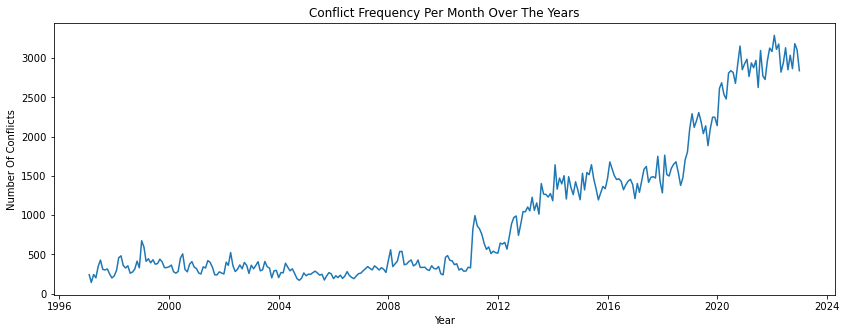

In [63]:
# Plot the time series to see how the conflict frequency per month has changed over the years
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency Per Month Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
plt.plot(monthly_freq);

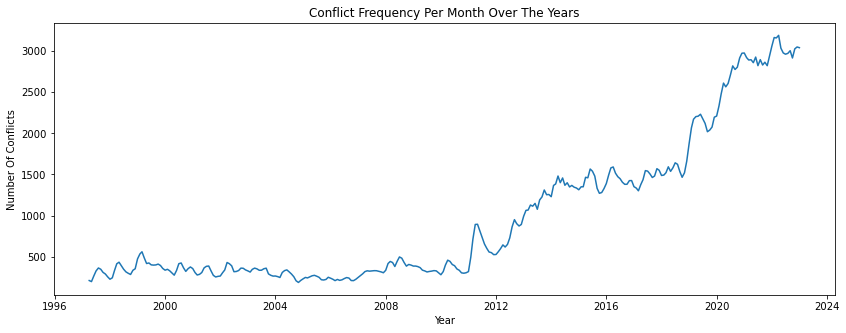

In [64]:
#Smooth out the curve using rolling average
plt.figure(figsize=(14,5))
plt.title("Conflict Frequency Per Month Over The Years")
plt.xlabel("Year")
plt.ylabel("Number Of Conflicts")
monthly_rolling = monthly_freq.rolling(3).mean()
plt.plot(monthly_rolling);

<Figure size 1440x1440 with 0 Axes>

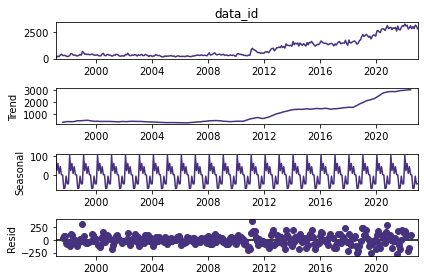

In [138]:
# Perform a seasonal decomposition of the monthly conflict events using STL
import statsmodels.api as sm

stl = sm.tsa.seasonal_decompose(monthly_freq, model='additive', freq=12)
plt.figure(figsize=(20, 20))
stl.plot()
plt.show();

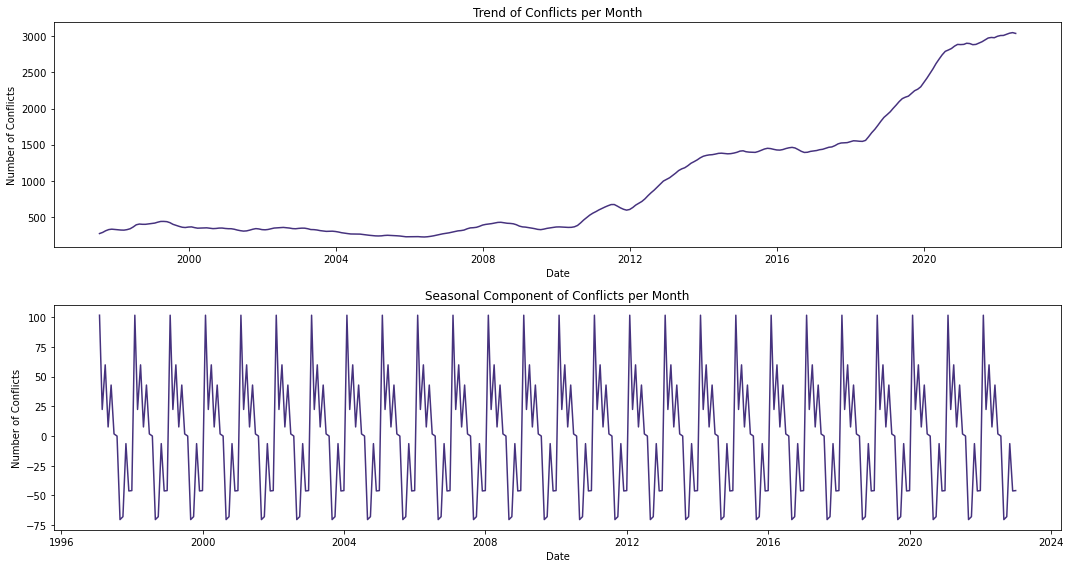

In [139]:
#To better visualize the plots lets plot only the trend and seasonal components
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(15, 8))
ax1.plot(stl.trend)
ax1.set_title('Trend of Conflicts per Month')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Conflicts')

# Plot the seasonal component on the second subplot
ax2.plot(stl.seasonal)
ax2.set_title('Seasonal Component of Conflicts per Month')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Conflicts')

plt.tight_layout()
plt.show();

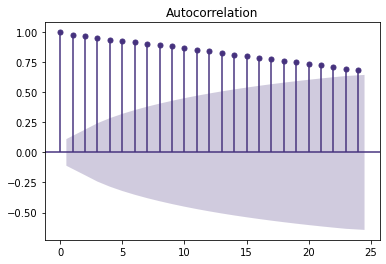

In [140]:
#Calculate the autocorrelation function of the monthly conflict events
acf = sm.graphics.tsa.plot_acf(monthly_freq, lags=24)
acf.show()

**Observations**
The  trend shows that the number of conflicts per month is increasing over the years.The number of conflicts per month also show seasonality over the years

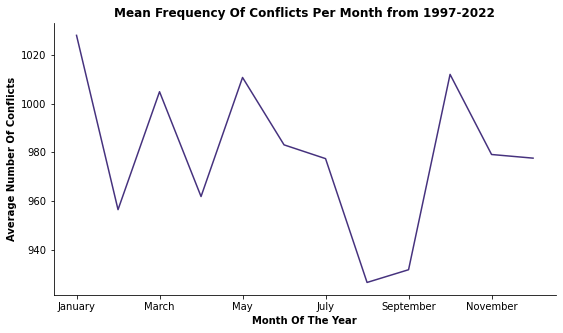

In [183]:
## Now lets look at how  the number of conflicts vary per month over a year
#first calculate the average number of conflicts for each month then plot them
monthly_means =df.groupby(["year","month"])["month"].count()
monthly_means = round(monthly_means.groupby("month").mean(),2)
monthly_means = monthly_means.reindex(index=months)
plt.figure(figsize=(9,5))
monthly_means.plot(kind="line")
plt.title("Mean Frequency Of Conflicts Per Month from 1997-2022",fontweight="bold")
plt.ylabel("Average Number Of Conflicts",fontweight="bold")
plt.xlabel("Month Of The Year",fontweight="bold")
sb.despine()
# plt.savefig("freq.svg",dpi=300)

**Observations**
The average number of conflicts fluctauate and increase over several months in the year.
January,March ,May and October tend to have the highest number of conflicts .
The number of conflicts tend to decrease from May to August.These are winter months
This might suggest that there might be some seasonal variation of conflicts frequency .
But the pattern is not very appearantt as its only in winter that we notice the biggest deep.So we test the hypothesis that there might be seasonal variation of conflicts

In [66]:
##Select only the relevant columns to make visualising the data easier and less cluttered
event_month =df[["event_type","month"]]
event_month.sample(5)

,event_type,month
281419,Battles,October
27628,Protests,March
262081,Battles,May
2604,Battles,December
212384,Violence against civilians,May


In [67]:
#Group the event_types by month and find the number of occurance of each event type for each month
event_grouping = event_month.groupby(["event_type","month"]).size()
event_grouping

event_type                  month    
Battles                     April        6655
                            August       6470
                            December     6816
                            February     6000
                            January      6719
                                         ... 
Violence against civilians  March        6751
                            May          6601
                            November     6225
                            October      6062
                            September    5983
Length: 72, dtype: int64

In [68]:
#convert the resulting table into a dataframe
event_grouping = event_grouping.to_frame(name="count").reset_index()
event_grouping

,event_type,month,count
0,Battles,April,6655
1,Battles,August,6470
2,Battles,December,6816
3,Battles,February,6000
4,Battles,January,6719
...,...,...,...
67,Violence against civilians,March,6751
68,Violence against civilians,May,6601
69,Violence against civilians,November,6225
70,Violence against civilians,October,6062


In [69]:
#Reshape the dataframe using a pivot table
event_grouping = event_grouping.pivot_table(values='count',columns='event_type',index='month',fill_value=0)
event_grouping

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
month,,,,,,
April,6655,2109,5547,2845,1603,6248
August,6470,1935,5221,2666,1881,5916
December,6816,1740,6017,2304,2192,6348
February,6000,1788,6412,2752,1827,6088
January,6719,1973,6189,3281,1898,6669
July,6660,1928,5499,2917,1793,6615
June,6967,1863,5733,2590,1950,6456
March,6558,1873,6285,2858,1802,6751
May,6599,2103,6151,2959,1866,6601


In [70]:
#Reindex the dataframe
event_grouping = event_grouping.reindex(sorted(event_grouping.columns),axis=1)
event_grouping

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
month,,,,,,
April,6655,2109,5547,2845,1603,6248
August,6470,1935,5221,2666,1881,5916
December,6816,1740,6017,2304,2192,6348
February,6000,1788,6412,2752,1827,6088
January,6719,1973,6189,3281,1898,6669
July,6660,1928,5499,2917,1793,6615
June,6967,1863,5733,2590,1950,6456
March,6558,1873,6285,2858,1802,6751
May,6599,2103,6151,2959,1866,6601


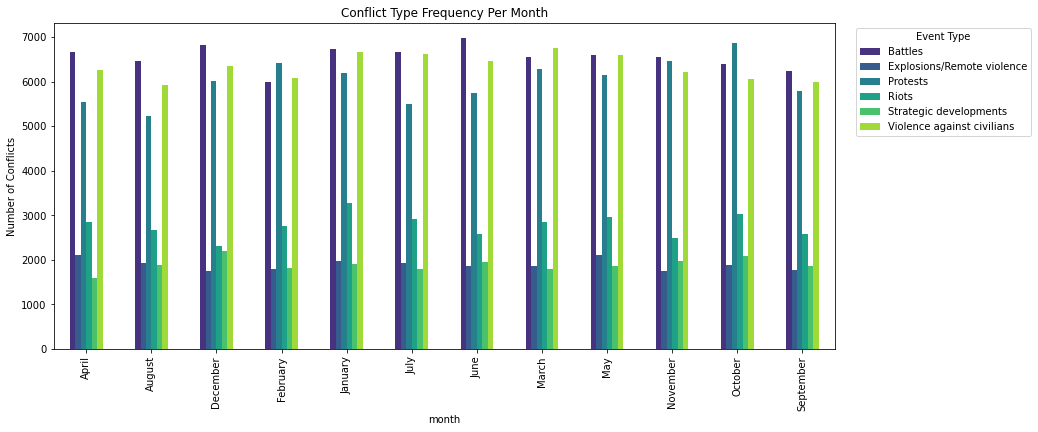

In [125]:
#Plot dataframe on a bar graph
event_grouping.plot(kind='bar',  figsize=(14, 6))
plt.legend(title='Event Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Conflict Type Frequency Per Month")
plt.ylabel("Number of Conflicts");

In [23]:
#The baove graph is not very easy to visualise so lets reorder the conflict types from the ones in descending order
columns = ["Battles","Violence against civilians","Protests","Riots","Strategic developments","Explosions/Remote violence"]
event_grouping = event_grouping[columns]
event_grouping= event_grouping.reindex(months)
event_grouping

event_type,Battles,Violence against civilians,Protests,Riots,Strategic developments,Explosions/Remote violence
month,,,,,,
January,6719,6669,6189,3281,1898,1973
February,6000,6088,6412,2752,1827,1788
March,6558,6751,6285,2858,1802,1873
April,6655,6248,5547,2845,1603,2109
May,6599,6601,6151,2959,1866,2103
June,6967,6456,5733,2590,1950,1863
July,6660,6615,5499,2917,1793,1928
August,6470,5916,5221,2666,1881,1935
September,6235,5983,5788,2576,1860,1783


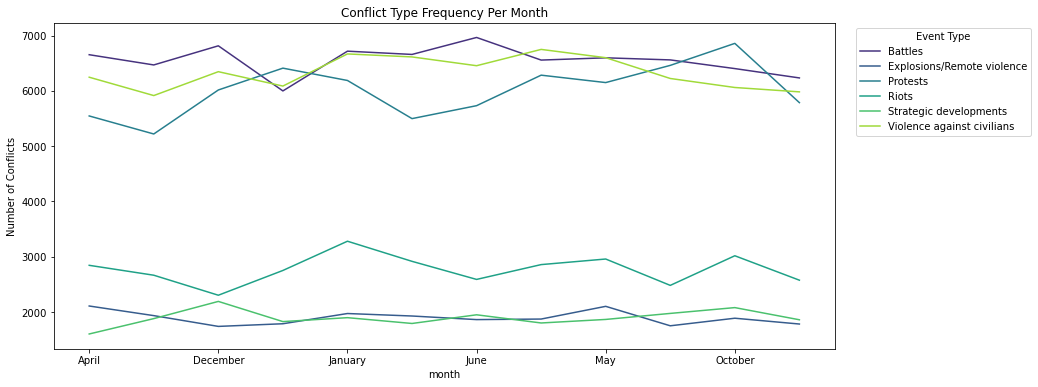

In [124]:
#plot this on a line graph
event_grouping.plot(kind='line',  figsize=(14, 6))
plt.legend(title='Event Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Conflict Type Frequency Per Month")
plt.ylabel("Number of Conflicts");

**Observations**
Battles ,Violence against civilians and Protests are the most common conflict types
Battles  are the highest conflict type in most months.
Strategic deployments and remote explosions are the lest frequent conflict types across all months
October tend to have an unusually  number of Protests
Most conflicts tend to decrease in February , except for Protests.While all conflicts start on a relatively high frequency in January,Protests starts lower but then begin to rise towards Frebruary as other conflicts begin to decrease
Number of protests significantly decrease in winter ie from May to August


### Seasonal Variation Of Conflicts

From our previous analysis there seems to be some patterns in the variation of conflict frequnecy in certain months.So we divide the year into seasons to see the patterns of conflict frequency and conflict type frequency in these frequency. We initially created a a seasons column so we will be working with it more

In [121]:
#Select relevant columns
variation_seasonal = df[["event_type","season","region","country"]]
variation_seasonal.sample(5)

,event_type,season,region,country
48355,Violence against civilians,winter,Middle Africa,Democratic Republic of Congo
71248,Violence against civilians,summer,Middle Africa,Democratic Republic of Congo
188799,Battles,spring,Eastern Africa,Somalia
165868,Riots,summer,Eastern Africa,Somalia
85546,Riots,winter,Southern Africa,South Africa


In [122]:
#Create a contingency table to calculate the frequency of conflicts in each season
season_freq = pd.crosstab(index=df["season"], columns='count')
season_freq

col_0,count
season,
autumn,77413
spring,75993
summer,77013
winter,75060


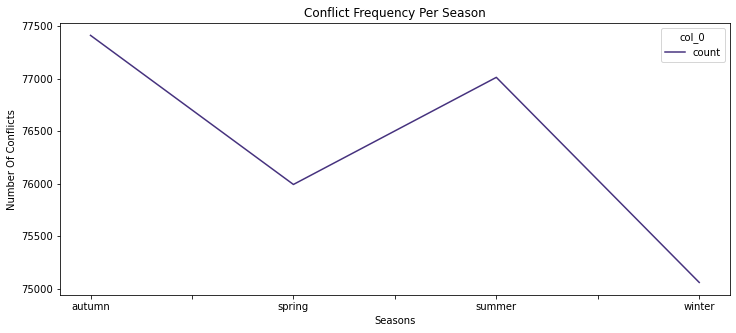

In [123]:
#Visualize this on a bar chart
season_freq.plot(kind="line",figsize=(12,5))
plt.ylabel("Number Of Conflicts")
plt.xlabel("Seasons")
plt.title("Conflict Frequency Per Season");

**Observations**
The variations in number of conflicts in each season are not very large they fall within a range of 2000 difference
Autumn and Summer have the highest number of conflicts
Winter has the lowest number of conflicts

#### Next we explore how each conflict type varies by season

In [30]:
#Create a cross tab that calculates the frequency of each event_type per season
seasonal_var =pd.crosstab(variation_seasonal["event_type"],variation_seasonal["season"])
seasonal_var

season,autumn,spring,summer,winter
event_type,,,,
Battles,19812,19200,19535,20097
Explosions/Remote violence,6085,5422,5501,5726
Protests,17983,19110,18618,16453
Riots,8662,8076,8337,8173
Strategic developments,5271,5915,5917,5624
Violence against civilians,19600,18270,19105,18987


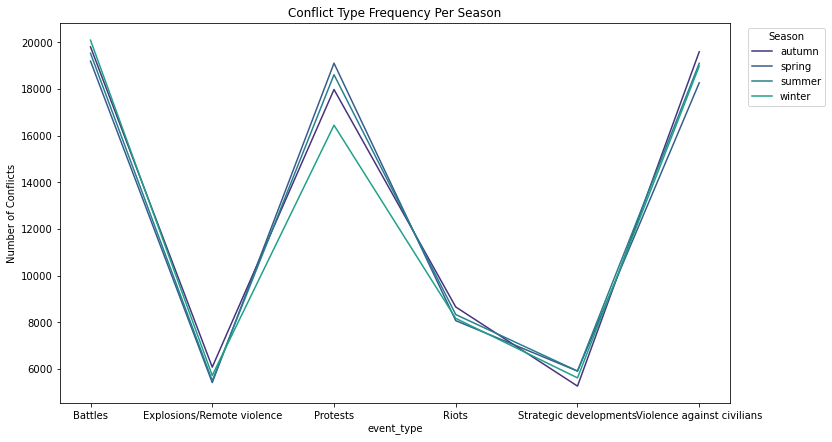

In [128]:
##Plot the results on a bar graph
sb.color_palette("viridis")
seasonal_var.plot(kind="line", figsize=(12,7))
plt.title("Conflict Type Frequency Per Season")
plt.ylabel("Number of Conflicts")
plt.legend(title='Season', bbox_to_anchor=(1.02, 1), loc='upper left');

**Observations**
Autumn has the most number of conflicts for most of the conflict types
Autumn and Spring has the overall highest number  of conflicts for most of the event types per season
We have the most battles in winter

### We have observed that conflicts vary by different months and the seasonal variations are not very appearant since there seems to be slight variations per season.So we can test the hypothesis that there is a seasonal variation in the frequency of conflicts

**Hypothesis**
H0 : There is no seasonal pattern in the frequency of conflict events
H1 : There is a seasonal pattern in the frequency of conflict events
Significance level : 0.05

In [129]:
## Test the hypothesis that there is a seasonal variation in the frequency of conflicts
from scipy.stats import chi2_contingency

# calculate the test statistic and p-value
chi2_stat, p_val, dof, expected = chi2_contingency(season_freq)
print(f"Chi-statistic : {chi2_stat}")
print(f"p-value : {p_val}")
if( p_val < 0.05):
    print("Reject the null hypothesis.There is signficant evidence of a seasonal pattern in the frequency of conflict events")
else :
    print("Fail to reject the null hypothesis.There is insignificant evidence to support that there is a seasonal pattern in the  frequency of conflict events")

Chi-statistic : 0.0
p-value : 1.0
Fail to reject the null hypothesis.There is insignificant evidence to support that there is a seasonal pattern in the  frequency of conflict events


**Observations**
We fail to reject the null hypothesis and therefore conclude that there is no seasonal variation in the frequency of conflicts.
The number of conflicts tend to be concentrated in certain months of certain seasons rather than the season as a whole. However a season like Autumn records the most number of conflicts, while others are relatively stable.

#### How does conflict frequency per season vary by region

In [131]:
#Visualize the data before furthur exploration
variation_seasonal.sample(5)

,event_type,season,region,country
139834,Battles,winter,Eastern Africa,Somalia
169139,Strategic developments,spring,Eastern Africa,Burundi
149266,Battles,summer,Eastern Africa,Somalia
18978,Protests,winter,Southern Africa,South Africa
104697,Explosions/Remote violence,summer,Eastern Africa,South Sudan


In [132]:
#Count the number of conflicts for each region by season
season_reg = variation_seasonal.groupby(["season","region"]).size()
season_reg

season  region         
autumn  Eastern Africa     23000
        Middle Africa      11063
        Northern Africa    18289
        Southern Africa     7724
        Western Africa     17337
spring  Eastern Africa     23890
        Middle Africa      12144
        Northern Africa    17057
        Southern Africa     6891
        Western Africa     16011
summer  Eastern Africa     23334
        Middle Africa      12309
        Northern Africa    18599
        Southern Africa     5773
        Western Africa     16998
winter  Eastern Africa     24370
        Middle Africa      11672
        Northern Africa    15761
        Southern Africa     7543
        Western Africa     15714
dtype: int64

In [133]:
s1 = season_reg.to_frame(name="count")
s1

count
season region                
autumn Eastern Africa   23000
       Middle Africa    11063
       Northern Africa  18289
       Southern Africa   7724
       Western Africa   17337
spring Eastern Africa   23890
       Middle Africa    12144
       Northern Africa  17057
       Southern Africa   6891
       Western Africa   16011
summer Eastern Africa   23334
       Middle Africa    12309
       Northern Africa  18599
       Southern Africa   5773
       Western Africa   16998
winter Eastern Africa   24370
       Middle Africa    11672
       Northern Africa  15761
       Southern Africa   7543
       Western Africa   15714

In [134]:
#Reshape the data using a pivot table
s2 = s1.pivot_table(index="season",columns="region",values="count")
s2

region,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa
season,,,,,
autumn,23000,11063,18289,7724,17337
spring,23890,12144,17057,6891,16011
summer,23334,12309,18599,5773,16998
winter,24370,11672,15761,7543,15714


In [135]:
#Put regions on the index column
s4 = s1.pivot_table(index="region",columns="season",values="count")
s4

season,autumn,spring,summer,winter
region,,,,
Eastern Africa,23000,23890,23334,24370
Middle Africa,11063,12144,12309,11672
Northern Africa,18289,17057,18599,15761
Southern Africa,7724,6891,5773,7543
Western Africa,17337,16011,16998,15714


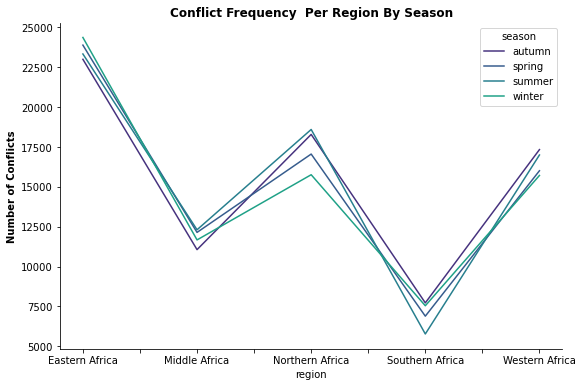

In [136]:
#plot on a line graph
s4.plot(figsize=(9,6))
plt.title("Conflict Frequency  Per Region By Season",fontweight="bold")
plt.ylabel("Number of Conflicts",fontweight="bold")
sb.despine()
plt.savefig("seasonfreq.svg",dpi=300)


**Observations**
Eastern Africa and Northern Africa have the highest number of conflicts
Winter has the highest number of conflicts in Eastern Africa unlike most regions
Summer only has the lowest number of conflicts in Southern Africa
In summer, the most conflicts occur in Eastern Africa and Northern Africa whereas the least conflicts occur in Southern Africa and Middle Africa
In autumn, the most conflicts occur in Eastern Africa and Northern Africa whereas the least conflicts occur in Southern Africa and Middle Africa
In winter, the most conflicts occur in Eastern Africa and Northern Africa whereas the least conflicts occur in Southern Africa and Middle Africa
In spring, the most conflicts occur in Eastern Africa and Northern Africa whereas the least conflicts occur in Southern Africa and Middle Africa
There seems to be a pattern here, Eastern Africa and Northern Africa are alwys on the high while Sourthen Africa and Middle Africa are on the low in terms of conflict frequency

### Conflict frequency per year

In [43]:
year_variation = df[["year","event_type","region"]]
year_variation.sample(5)

,year,event_type,region
0,2022,Battles,Middle Africa
1,2022,Strategic developments,Middle Africa
2,2022,Violence against civilians,Middle Africa
3,2022,Battles,Middle Africa
4,2022,Violence against civilians,Eastern Africa
...,...,...,...
305474,1997,Battles,Western Africa
305475,1997,Battles,Western Africa
305476,1997,Violence against civilians,Western Africa
305477,1997,Battles,Western Africa


In [141]:
year_var = year_variation.groupby(["year","region"]).size()
year_var.sample(5)

year  region         
2015  Eastern Africa     6070
2020  Southern Africa    2272
2001  Middle Africa       725
2003  Western Africa      730
1998  Southern Africa     228
dtype: int64

In [142]:
#Reshape into a pivot table
year_var1 = year_var.to_frame(name="count")
year_var1 = year_var1.pivot_table(index="year",columns="region",values="count")
year_var1

region,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa
year,,,,,
1997,655,649,448,134,1323
1998,922,917,350,228,2129
1999,961,2002,311,177,1431
2000,1359,605,480,511,1220
2001,1162,725,523,462,738
2002,1622,543,678,882,572
2003,1690,394,445,491,730
2004,1165,349,724,454,482
2005,1179,395,529,433,373


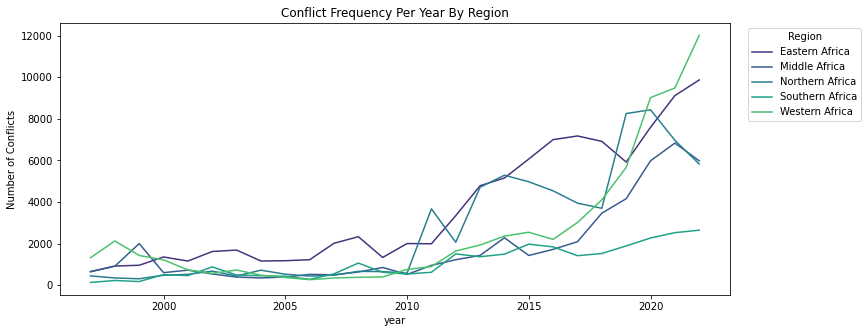

In [143]:
#plot using line graphs
year_var1.plot(figsize=(12,5))
plt.legend(title="Region",bbox_to_anchor=(1.02,1),loc="upper left")
plt.title("Conflict Frequency Per Year By Region")
plt.ylabel("Number of Conflicts");

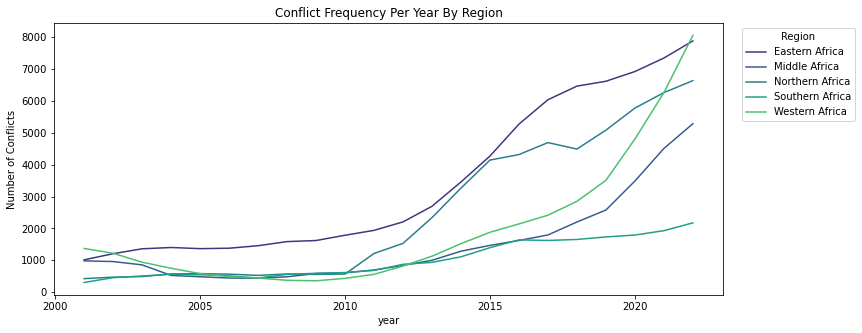

In [144]:
#This graph has a lot of random fluctautions so lets smooth the lines by using moving averages
ma_df = year_var1.rolling(window=5).mean()
ma_df.plot(figsize=(12,5))
plt.legend(title="Region",bbox_to_anchor=(1.02,1),loc="upper left")
plt.title("Conflict Frequency Per Year By Region")
plt.ylabel("Number of Conflicts");

**Observations**
The number of conflicts is increasing over the years since 2010
The number of conflicts per year were very low in the first 13 years
The number of conflicts fluctaute and increase regulary over the years
In 2010, North Africa had  the biggest hike in the number of conflicts, which then decreased in 2018 to only only to spike again the following year
Western Africa has the steepest curve for increase in the number of conflicts

### From the above its seems like the number of conflicts has increased over time.Lets  the signficance of this statement using a hypothesis test

Hypothesis
H0 : The number of conflicts is not increasing over time
H1 : The number of conflicts has increased over time

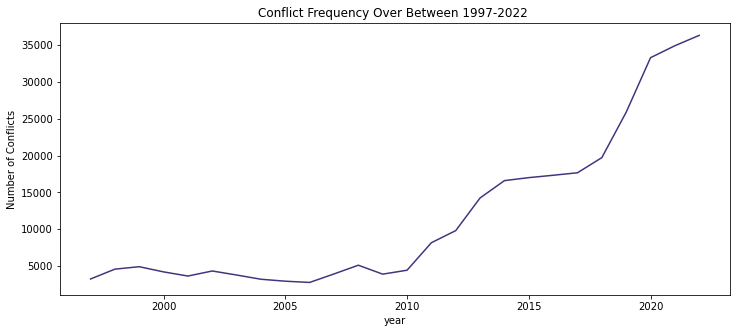

In [145]:
#Visualize how the number of conflicts have changed over the years
conflicts_year = year_variation.groupby("year")["event_type"].count()
conflicts_year.plot(figsize=(12,5))
plt.title("Conflict Frequency Over Between 1997-2022 ")
plt.ylabel("Number of Conflicts");


In [146]:
#save this formatted dataframe into a csv file
conflicts_year.reset_index(name="conflicts")
conflicts_year.to_csv("conflicts_year.csv")

In [155]:
xc = df.groupby(["year"])["fatalities"].sum()
xc.sample(10);

## Regional Differences In Conflict Types

In [158]:
#First look at the face of Africa in the past(1997)  and the current(2022)
conflicts_1997 = df.loc[df["year"]==1997]
conflicts_2022 = df.loc[df["year"]==2022]
conflicts_2022.sample(10)

,data_id,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,month,day,season
20701,9357014,2022-06-04,2022,1,Violence against civilians,Attack,Police Forces of Mozambique (1990-),NaN,State Forces,Civilians (Mozambique),...,35.3442,1,Radio Mozambique,National,"On 4 June 2022, two police officers shot and k...",1,2022-06-13 21:20:34,June,04,winter
18518,9386860,2022-06-25,2022,1,Protests,Peaceful protest,Protesters (Kenya),Labour Group (Kenya),Protesters,NaN,...,36.7268,2,Kenyans.co,National,"On 25 June 2022, local residents, mainly const...",0,2022-07-05 16:39:30,June,25,winter
7865,9582106,2022-10-14,2022,1,Violence against civilians,Attack,ADF: Allied Democratic Forces,NaN,Rebel Groups,Civilians (Democratic Republic of Congo),...,29.8454,1,Politico (DRC); 7 Sur 7; SOS Medias,New media-National,"On 14 October 2022, ADF attacked a mine site c...",9,2022-10-24 22:29:57,October,14,spring
35777,8706610,2022-01-06,2022,1,Battles,Armed clash,Military Forces of the Democratic Republic of ...,NaN,State Forces,Military Forces of Burundi (2005-),...,29.0879,2,SOS Medias,New media,"On 6 January 2022, the FARDC clashed against t...",2,2022-01-11 01:18:08,January,06,summer
18887,9386984,2022-06-22,2022,2,Strategic developments,Looting/property destruction,Unidentified Armed Group (Lesotho),NaN,Political Militias,Civilians (Lesotho),...,27.2374,1,Post (Lesotho),National,Property destruction: Around 22 June 2022 (wee...,0,2022-07-05 16:39:30,June,22,winter
15194,9629222,2022-07-30,2022,1,Riots,Mob violence,Rioters (Uganda),Students (Uganda),Rioters,Rioters (Uganda),...,30.9597,1,Independent (Uganda),National,"On 30 July 2022, students of Daystar Secondary...",0,2022-11-08 21:42:43,July,30,winter
5891,9610468,2022-11-01,2022,1,Protests,Peaceful protest,Protesters (Burkina Faso),Labour Group (Burkina Faso),Protesters,NaN,...,-1.0844,1,L'Observateur Paalga,National,"On 1 November 2022, a number of merchants demo...",0,2022-11-07 20:09:01,November,01,spring
25905,9151134,2022-04-10,2022,2,Violence against civilians,Sexual violence,Katsina Communal Militia (Nigeria),Zamfara Communal Militia (Nigeria),Identity Militias,Civilians (Nigeria),...,10.5711,1,Daily Trust (Nigeria); Premium Times (Nigeria),National,"Around 10 April 2022 (as reported), around 200...",0,2022-04-25 16:05:56,April,10,autumn
1840,9727440,2022-12-11,2022,1,Violence against civilians,Attack,Islamic State (West Africa) and/or Boko Haram ...,NaN,Rebel Groups,Civilians (Cameroon),...,14.1061,1,Undisclosed Source,Local partner-Other,"On 11 December 2022, suspected ISWAP or Boko H...",0,2023-01-09 23:31:14,December,11,summer
9664,9508187,2022-09-25,2022,1,Strategic developments,Non-violent transfer of territory,Military Forces of Somalia (2022-),Police Forces of Somalia (2022-) Southwest Spe...,State Forces,Al Shabaab,...,43.6726,1,Radio Kulmiye; Goobjoob,National,"On 25 September 2022, government security forc...",0,2022-10-03 21:36:28,September,25,spring


In [159]:
#Now calculate the number of conflicts per country in each year ie 1997 and 2022
a1997 = conflicts_1997.groupby("country").size().reset_index(name="conflicts")
a2022 = conflicts_2022.groupby("country").size().reset_index(name="conflicts")


In [188]:
# Create a choropleth map using plotly express
import plotly.express as px
import plotly.io as pio
fig = px.choropleth(a2022,
                    locations='country',  # Column containing the country name
                    locationmode='country names',  # Set the location mode to country names
                    color='conflicts',  # Column giving the color intensity for each country
                    hover_name='country', # Column adding hover text
                    color_continuous_scale='viridis', # Set the color scale
                    range_color=[0, a2022['conflicts'].max()],scope="africa")  # Set the range of the color scale

# Add a title to the plot
fig.update_layout(title_text='Number of Conflicts per Country in 2022',height=500,
    width=500)


# Show the plot
fig.show()
pio.write_image(fig, 'a2022.svg')

In [163]:
# Create a choropleth map using plotly express
fig = px.choropleth(a1997,
                    locations='country',  # Column containing the country name
                    locationmode='country names',  # Set the location mode to country names
                    color='conflicts',  # Column giving the color intensity for each country
                    hover_name='country', # Column adding hover text
                    color_continuous_scale='viridis', # Set the color scale
                    range_color=[0, a2022['conflicts'].max()],scope="africa")  # Set the range of the color scale

# Add a title to the plot
fig.update_layout(title_text='Number of Conflicts per Country in 1997',height=500,
    width=500)

# Show the plot
fig.show()
pio.write_image(fig, 'africa97.svg')

### From the above we can see that the conflict face of Africa has changed.So lets look at how it has changed and try to predict how it might continue to change

#### How severe are the changed in the conflict patterns in Africa in terms of conflict frequency and fatality

In [169]:
#Create a df for fatlities per year and conflicts per year
conflicts_fatalities= df.groupby("year").sum()["fatalities"].reset_index(name="fatalities")
conflict_frequencies = df.groupby("year").size().reset_index(name="conflicts")
conflict_frequencies.head(10);

In [ ]:
ice_colors = [(0.98, 0.98, 1.0), (0.94, 0.96, 0.99), (0.89, 0.93, 0.98),
              (0.82, 0.88, 0.96), (0.71, 0.81, 0.94), (0.56, 0.73, 0.92),
              (0.38, 0.64, 0.89), (0.20, 0.52, 0.83), (0.09, 0.38, 0.71),
              (0.03, 0.24, 0.54)]
ice_cmap = plt.cm.colors.ListedColormap(ice_colors)

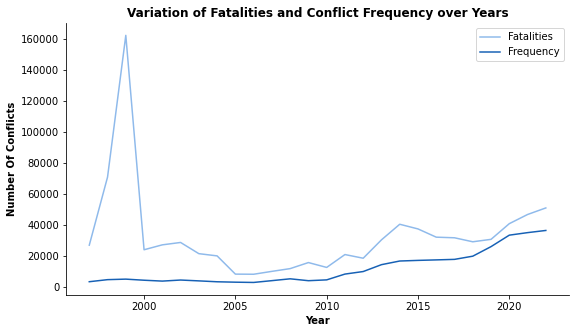

In [171]:
#Plot fatality and conflict frequency on the same axis

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(9, 5))
sb.set_palette('viridis')
# Create the first line plot
#passing the ax parameter will make them appear on the same axis
sb.lineplot(data=conflicts_fatalities, x='year', y='fatalities', label='Fatalities', ax=ax,color=ice_cmap(0.5))

# Create the second line plot
sb.lineplot(data=conflict_frequencies, x='year', y='conflicts', label='Frequency', ax=ax,color=ice_cmap(0.8))

# Set the title and axis labels
# sb.set_style('whitegrid')
plt.title('Variation of Fatalities and Conflict Frequency over Years',fontweight="bold")
plt.xlabel('Year',fontweight="bold")
plt.ylabel('Number Of Conflicts',fontweight="bold")
sb.despine()
plt.savefig("fatality_comp.svg",dpi=300);

##### 1999 had an unsually high number of fatalities althoug it had a relatively low conflict frequency(number of conflicts), this might have been due to a war of some conflict, our map above showed a higher conflict zone in Sierra Lione, we will explore this furthur
##### There was a signficant drop in fatality between 2003 and 2005 although the number of conflicts didnt reduce much.The number of conflicts started to increase slowly until 2010 where it  became more steeper. After 2010 fatality and conflict frequency were at al time high conpared to the past period

### How has conflict frequency across the regions in Africa

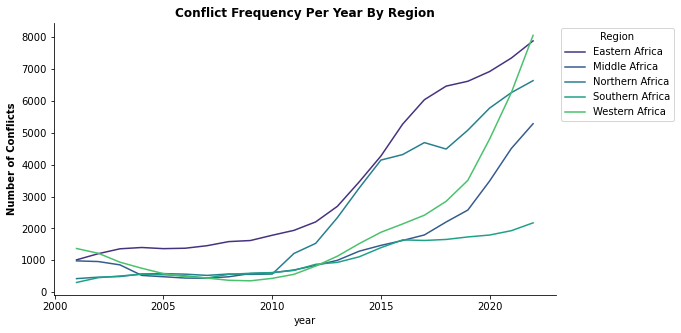

In [172]:
sb.set_palette('viridis')

ma_df.plot(figsize=(9,5))
plt.legend(title="Region",bbox_to_anchor=(1.0,1),loc="upper left")
plt.title("Conflict Frequency Per Year By Region",fontweight="bold")
plt.ylabel("Number of Conflicts",fontweight="bold")
sb.despine()
plt.savefig("conflict.svg",dpi=300);

In [ ]:
sb.set_palette('viridis')
sb.despine()
plt.savefig("conflict.svg",dpi=300);

##### Eastern Africa and Western Africa are having the biggest increases in conflict over the years while southern Africa remains the most peaceful region in Africa. All regions show the increasing number of conflicts trend, with the first 13 years being having low conflicts the increasing signficantly after 2010.What happened in 2010 ? Eastern Africa has always ha dthe highest conflict frequency over the years

In [176]:
#Find the sum of each conflict type per year
conflict_variation = df.groupby(["event_type","year"]).size().reset_index(name="count")
conflict_variation.sample(10);

In [177]:
#Reshape the data
conflict_variation1 = conflict_variation.pivot_table(index="year",columns="event_type",values="count")
conflict_variation1

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
year,,,,,,
1997,1184,131,244,137,615,898
1998,1650,136,249,183,1115,1213
1999,2685,198,218,174,679,928
2000,1817,224,256,227,445,1206
2001,1502,127,230,267,328,1156
2002,1724,183,270,245,186,1689
2003,1455,278,290,203,125,1399
2004,1059,217,317,219,103,1259
2005,913,70,450,285,116,1075


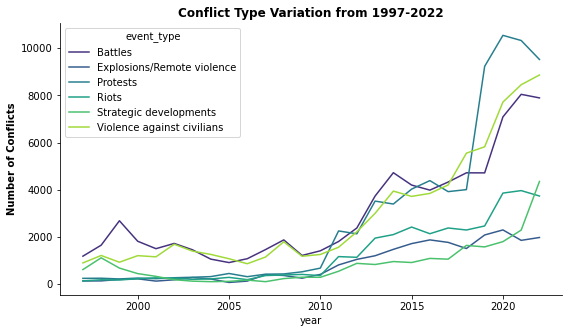

In [178]:
#How does these types of conflicts vary across time
conflict_variation1.plot(kind="line",figsize=(9,5))
plt.title("Conflict Type Variation from 1997-2022",fontweight="bold")
plt.ylabel("Number of Conflicts",fontweight="bold")
# plt.legend(title="Region",bbox_to_anchor=(1.0,1),loc="upper left")
sb.despine()
plt.savefig("type_var.svg",dpi=300);

#### Protests were very low for the first 13 years, but have become the most common type of conflict and still continues to rise.The top 3 conflicts are Protests, violence against citizens and battles while the least common type of conflict are explosions

#### Analyse conflict composition by region

In [179]:
#select the relevant columns
conflict_composition = df[["event_type","region","year"]]
conflict_composition.head(5)

,event_type,region,year
0,Battles,Middle Africa,2022
1,Strategic developments,Middle Africa,2022
2,Violence against civilians,Middle Africa,2022
3,Battles,Middle Africa,2022
4,Violence against civilians,Eastern Africa,2022


In [181]:
#group the conflicts by region and type
composition1 = conflict_composition.groupby(["region","event_type"]).size().reset_index(name="conflicts")
composition1.sample(5)

,region,event_type,conflicts
8,Middle Africa,Protests,4629
19,Southern Africa,Explosions/Remote violence,104
25,Western Africa,Explosions/Remote violence,3926
24,Western Africa,Battles,15112
13,Northern Africa,Explosions/Remote violence,8024


In [86]:
# find the total conflicts for each region
composition2 = composition1.set_index(["region","event_type"])
region_totals = composition2["conflicts"].sum(level="region")
region_totals.reset_index(name="conflicts")
region_totals = region_totals.to_frame()

In [87]:

total =region_totals["conflicts"].sum()
total

305479

In [ ]:
region_totals

In [88]:
#Find the percentage of conflicts attributed to only East and North Africa
east_north = 94594 + 69706
east_north = east_north/total * 100
round(east_north,2)

53.78

In [89]:
east = (94595)/total * 100
round(east,2)

30.97

### 54 % of conflicts in Africa happen in East and North Africa, the East alone accounts for 31% of the conflicts


In [93]:
def get_percentages(region,conflict):
    if(region=="Eastern Africa") :
        return round(conflict/94594 * 100,2)
    elif(region=="Middle Africa") :
        return round(conflict/47188*100 ,2)
    elif(region=="Northern Africa") :
        return round(conflict/69706*100 ,2)
    elif(region=="Southern Africa"):
        return round(conflict/271931*100 ,2)
    else:
        return round(conflict/66060*100 ,2)


In [95]:
regional_var1 = df.groupby(["region","event_type"]).size().reset_index(name="conflicts")
regional_var1

,region,event_type,conflicts
0,Eastern Africa,Battles,33911
1,Eastern Africa,Explosions/Remote violence,9722
2,Eastern Africa,Protests,10608
3,Eastern Africa,Riots,7836
4,Eastern Africa,Strategic developments,6349
5,Eastern Africa,Violence against civilians,26168
6,Middle Africa,Battles,17531
7,Middle Africa,Explosions/Remote violence,958
8,Middle Africa,Protests,4629
9,Middle Africa,Riots,3249


In [96]:
regionalv = regional_var1.pivot_table(index="event_type",columns="region",values="conflicts")
regionalv

region,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa
event_type,,,,,
Battles,33911,17531,11703,387,15112
Explosions/Remote violence,9722,958,8024,104,3926
Protests,10608,4629,31764,11904,13259
Riots,7836,3249,5929,8823,7411
Strategic developments,6349,5314,2910,637,7517
Violence against civilians,26168,15507,9376,6076,18835


In [97]:
#Find the number of each conflict type per region
regionalv2 = regional_var1.pivot_table(index="region",columns="event_type",values="conflicts")
regionalv2

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians
region,,,,,,
Eastern Africa,33911,9722,10608,7836,6349,26168
Middle Africa,17531,958,4629,3249,5314,15507
Northern Africa,11703,8024,31764,5929,2910,9376
Southern Africa,387,104,11904,8823,637,6076
Western Africa,15112,3926,13259,7411,7517,18835


In [109]:
#Reset the index
sty = regionalv.reset_index()
sty

region,event_type,Eastern Africa,Middle Africa,Northern Africa,Southern Africa,Western Africa
0,Battles,33911,17531,11703,387,15112
1,Explosions/Remote violence,9722,958,8024,104,3926
2,Protests,10608,4629,31764,11904,13259
3,Riots,7836,3249,5929,8823,7411
4,Strategic developments,6349,5314,2910,637,7517
5,Violence against civilians,26168,15507,9376,6076,18835


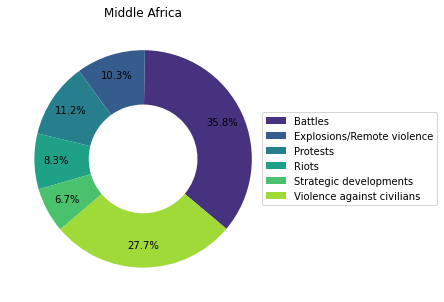

In [186]:
import matplotlib.pyplot as plt
labels1=sty["event_type"].values
sizes1=sty["Eastern Africa"]

# Data
labels = ['Battles', 'Riots', 'Protest']
sizes = [30, 50, 20]
colors_i = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7f7f7f', '#bcbd22', '#17becf']

sb.set_palette('viridis')
# Plot
fig, ax = plt.subplots(figsize=(9, 5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(sizes1, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)

# Legend
ax.legend(wedges, labels1, loc="center right", bbox_to_anchor=(1, 0, 0.6, 1))

# Title
ax.set_title("Middle Africa")
# plt.savefig("middle.svg",dpi=300)

plt.show()


In [112]:
# Create a function that will create a doughnut chart
def create_donut(region_title,region):
    sb.set_palette('viridis')
    # Plot
    fig, ax = plt.subplots(figsize=(9, 5), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(sty[region], wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)

    # Legend
    # ax.legend(wedges, labels1, loc="center right", bbox_to_anchor=(1, 0, 0.6, 1))

    # Title
    ax.set_title(f" {region_title} Africa")
    plt.savefig(f"{region_title}.svg",dpi=300)

    plt.show()



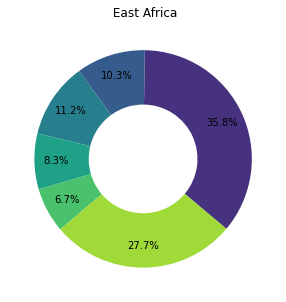

In [113]:
create_donut("East","Eastern Africa")

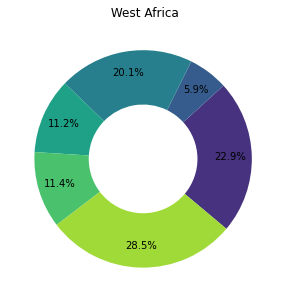

In [114]:
create_donut("West","Western Africa")

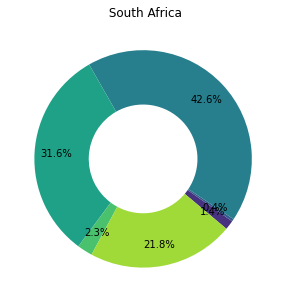

In [115]:
create_donut("South","Southern Africa")

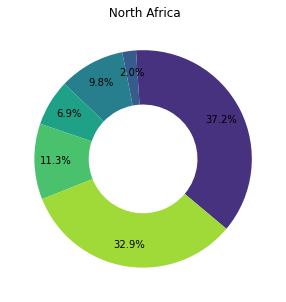

In [116]:
create_donut("North","Middle Africa")

### Most Common Conflicts Per Region
#### North Africa : 37.2% Battles
#### South Africa  : 42.6% Protests
#### West Africa  : 28.5 % Violence Against Civilians
#### East Africa  : 35.8% Battles
### Middle Africa  :35.8% Battles


#### Which Countries have the most conflicts

In [118]:
#Count the number of conflicts per country
df["country"].value_counts()

Somalia                                         38815
Nigeria                                         29027
Democratic Republic of Congo                    27447
Sudan                                           18614
South Africa                                    17971
Algeria                                         12084
Egypt                                           11445
Libya                                           11068
Burundi                                         10102
Tunisia                                          9776
Kenya                                            9456
Ethiopia                                         9449
South Sudan                                      8763
Uganda                                           8104
Mali                                             7804
Burkina Faso                                     7688
Cameroon                                         6805
Morocco                                          6719
Central African Republic    

In [119]:
#Find out how affected somalia was.
somalia =df.loc[df["country"]=="Somalia"]

#Find the number of fatalities
somalia["fatalities"].sum()

64987

### Somalia has had 38 815 conflicts since 1997 and 64 987 people have died because of that

# Recommendations
**Address underlying grievances**: Many conflicts in Africa are driven by socio-economic and political factors such as inequality, corruption, and lack of access to resources. Addressing these underlying grievances through policies and programs aimed at promoting economic growth, reducing corruption, and improving access to resources can help prevent conflicts from emerging in the first place.

**Promote peaceful protests**: Protests have become the most common type of conflict in Africa. While some protests can turn violent, many are peaceful expressions of dissent. Governments should work to create an environment where peaceful protests can take place without fear of repression or violence. How can  we create peaceful protest environments
This can be achieved by :
Ensure that citizens have the right to peaceful assembly and freedom of expression, as guaranteed by international human rights law.
Train law enforcement officials on how to manage peaceful protests without resorting to violence.
Encourage dialogue between protesters and government officials to address the root causes of grievance

**Protect citizens from violence**: Violence against citizens is one of the top conflicts in Africa. Governments should work to protect their citizens by providing security, strengthening law enforcement, and addressing human rights abuses.
This can be done by :
Strengthen law enforcement agencies and the judiciary to ensure that perpetrators of violence are held accountable.
Provide training to security personnel on human rights and the use of force in accordance with international standards.
Establish mechanisms for citizens to report human rights abuses and seek redress.

**Build peace and reconciliation**: In areas where conflict has already occurred, peacebuilding and reconciliation efforts can help promote healing and prevent future conflicts. This can involve measures such as promoting dialogue, providing reparations to victims, and supporting the reintegration of former combatants into society.
This can be done by :
Support the establishment of truth and reconciliation commissions to investigate past human rights abuses and promote healing.
Provide support for the reintegration of former combatants into society, such as job training or access to education.
Promote dialogue and cooperation between communities to build trust and reduce tensions.

**Strengthen regional cooperation**: Many conflicts in Africa are regional in nature, with spillover effects into neighboring countries. Strengthening regional cooperation can help prevent conflicts from spreading and facilitate the resolution of ongoing conflicts. This can involve measures such as creating joint peacekeeping forces, sharing intelligence, and promoting cross-border dialogue.
This can be achieved by :
Establish regional peacekeeping forces to prevent conflicts from spreading across borders.
Foster dialogue and cooperation between neighboring countries to address common challenges, such as resource management or security threats.
Share intelligence and coordinate efforts to prevent cross-border trafficking of arms or other illicit activities.


**Address climate change** : Climate change is expected to exacerbate conflicts in Africa by exacerbating resource scarcity and creating new migration patterns. Addressing climate change through policies aimed at reducing carbon emissions, promoting sustainable development, and adapting to changing weather patterns can help prevent future conflicts.
This is what can be done to address it :
Implement policies aimed at reducing greenhouse gas emissions and promoting sustainable development.
Invest in renewable energy and green infrastructure to reduce dependence on fossil fuels.
Provide assistance to vulnerable communities to adapt to the effects of climate change, such as drought or flooding.

**Support humanitarian relief efforts**: In areas affected by conflicts, humanitarian relief efforts can help provide essential services such as food, water, and medical care to those in need. Governments, NGOs, and international organizations should work together to provide this assistance and support the long-term recovery and reconstruction of affected communities.
This can be done by :
Provide funding and resources to NGOs and international organizations to deliver essential services such as food, water, and medical care to affected communities.
Promote transparency and accountability in the delivery of humanitarian assistance.
Work with local communities and stakeholders to develop long-term recovery and reconstruction plans.




